In [3]:
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as sk
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.utils import resample
from sklearn.model_selection import train_test_split

## read data 
CIP_data = pd.read_csv("CIP_data_encode_prev.csv")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[0.003479216260758089, 0.006946983546617935, 0.02171877925482124, 0.0412071078431373, 0.06761678543151228, 0.09375504276262703, 0.1384691195795007, 0.14827758362456311, 0.13541848680761837, 0.09619487908961588, 0.12462647213921607, 0.1328696925329429, 0.14760080277321652, 0.16026289180990905, 0.19181585677749358, 0.22352024922118385, 0.2679862961553102, 0.30112625963248374, 0.3121241513094083, 0.3542199488491049]


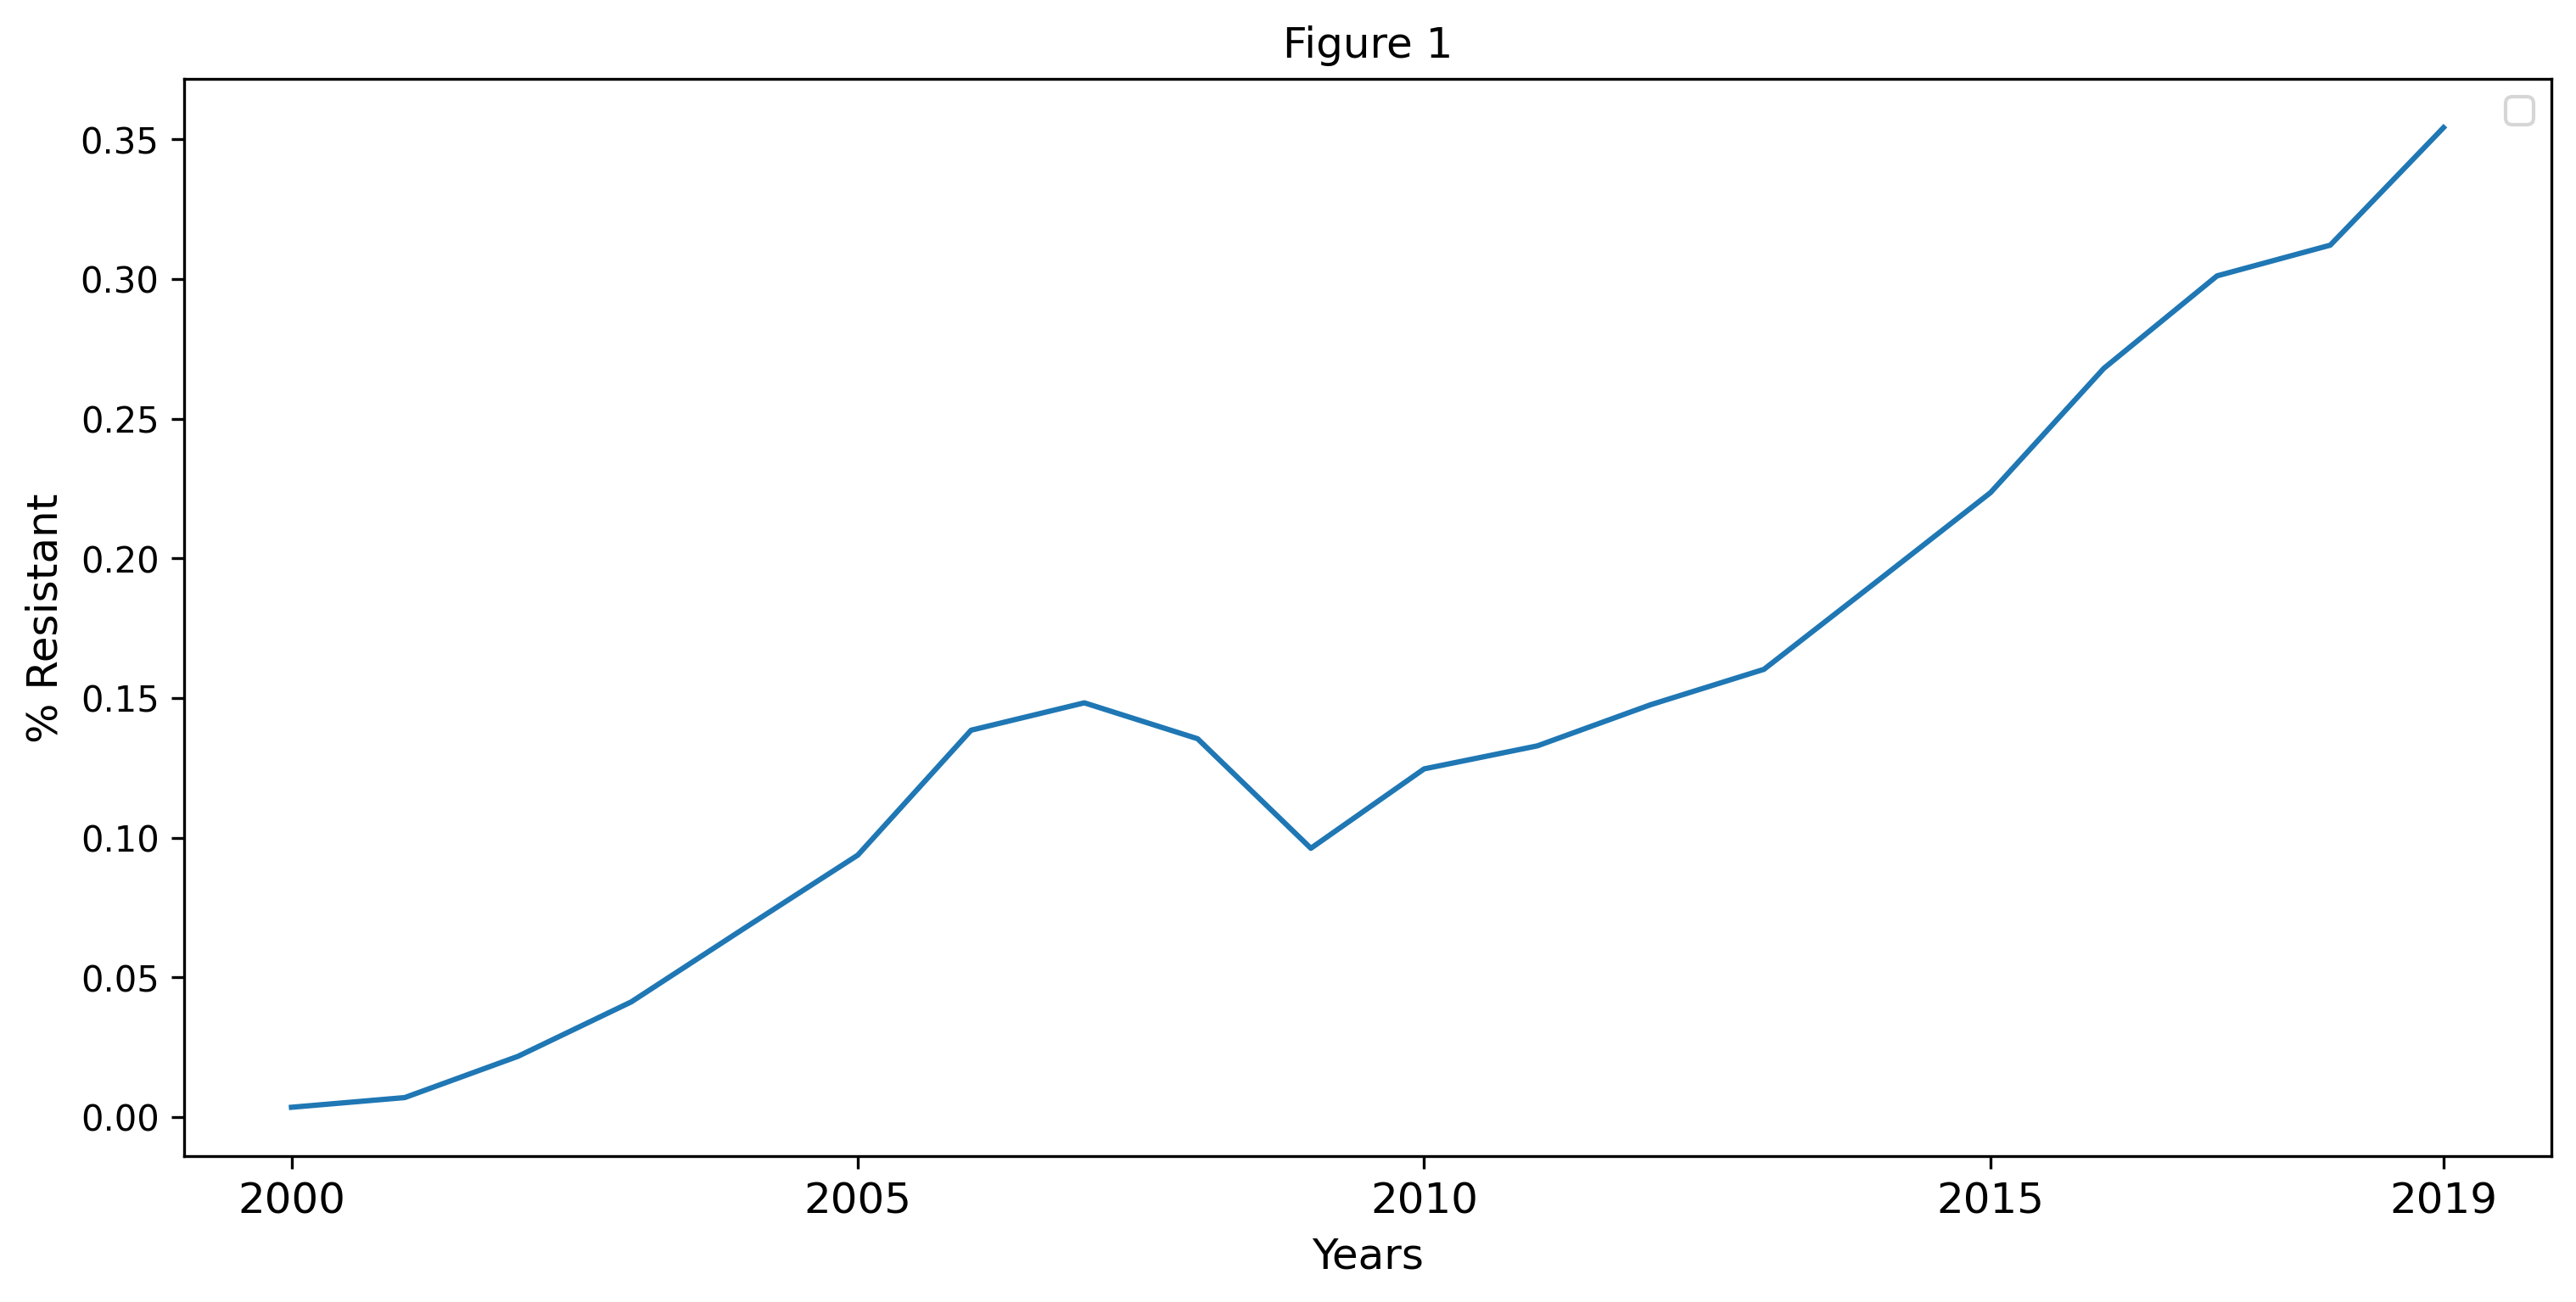

In [10]:
### Plotting ciprofloxacin by year 

xAxisYears = [2000, 2005, 2010, 2015, 2019]
figureCount = 1
plt.rcParams["figure.figsize"] = (12,5.5)

years = CIP_data["YEAR"].unique()
reistance_by_year = []
reistance_by_year_all = pd.DataFrame() 
for year in years:
    CIP_data_year = CIP_data.loc[CIP_data['YEAR'] == year]
    reistance_by_year.append(1 - CIP_data_year["Susceptible"].sum()/len(CIP_data_year))


print(reistance_by_year)


plt.plot(years, reistance_by_year)
plt.title("Figure " + str(figureCount))
figureCount+=1

plt.xlabel("Years", fontsize=12)
plt.ylabel("% Resistant to cipro", fontsize=12)
plt.xticks(xAxisYears, fontsize=12)
plt.rcParams['figure.dpi'] = 300
plt.legend()


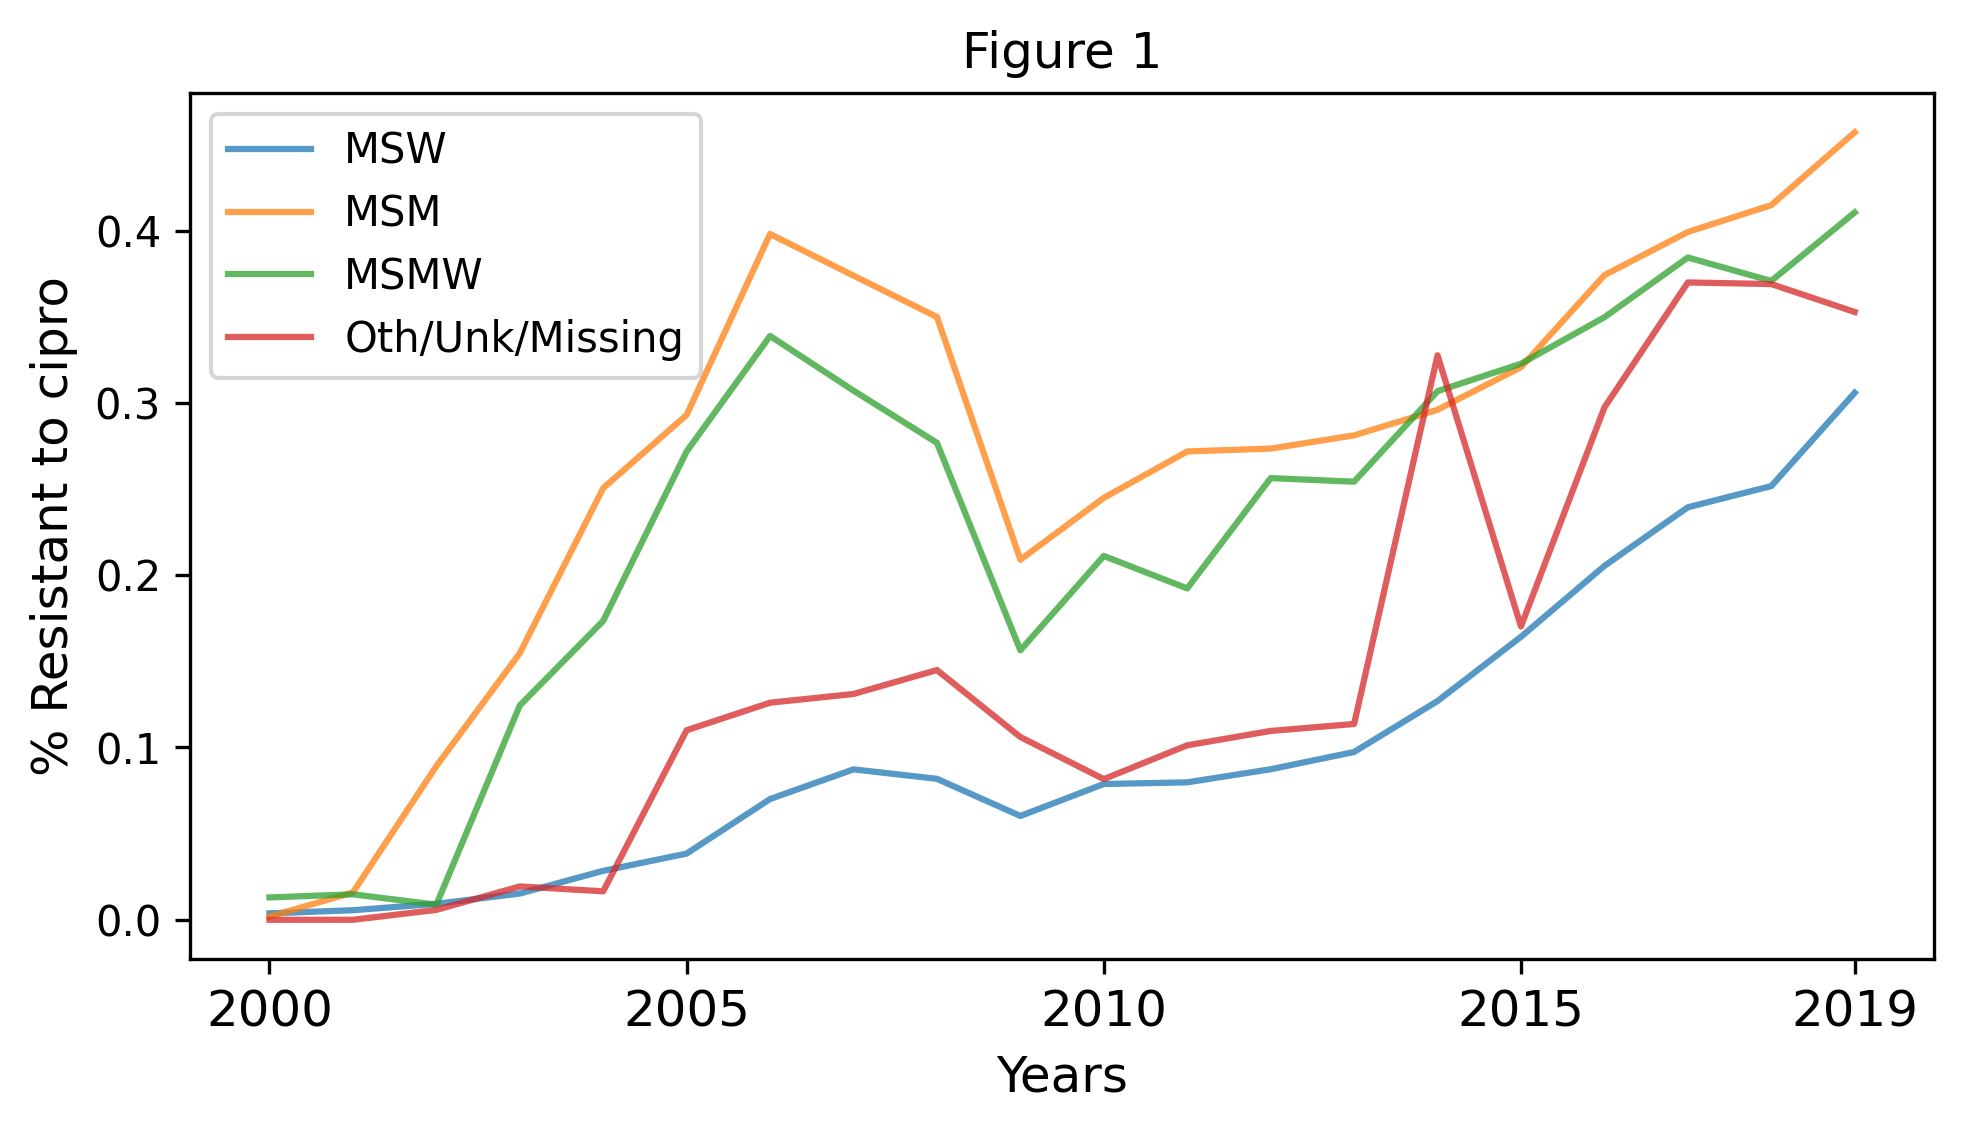

In [15]:
## By sexual partner
 xAxisYears = [2000, 2005, 2010, 2015, 2019]
figureCount = 1
plt.rcParams["figure.figsize"] = (12,5.5)

years = CIP_data["YEAR"].unique()
genders = CIP_data["GENDERSP"].unique()



plt.subplots(figsize=(7.5, 3.75))

#reistance_by_year_all = pd.DataFrame()
for gender in genders:
    CIP_data_gender = CIP_data.loc[CIP_data['GENDERSP'] == gender]
    reistance_by_year = []
    for year in years:
        CIP_data_gender_year = CIP_data_gender.loc[CIP_data_gender['YEAR'] == year]

        reistance_by_year.append(1 - CIP_data_gender_year["Susceptible"].sum()/len(CIP_data_gender_year))
        
    plt.plot(years, reistance_by_year, label=gender, alpha=0.75)

#  



#plt.plot(years, reistance_by_year)
plt.title("Figure " + str(figureCount))
figureCount+=1

plt.xlabel("Years", fontsize=12)
plt.ylabel("% Resistant to cipro", fontsize=12)
plt.xticks(xAxisYears, fontsize=12)
plt.rcParams['figure.dpi'] = 300
plt.legend()


/var/folders/d4/chxwf4hs5kq7ttsp56s64z65mjk3qj/T/ipykernel_44889/1831195092.py:20: RuntimeWarning: invalid value encountered in scalar divide
  reistance_by_year.append(1 - CIP_data_clinic_year["Susceptible"].sum()/len(CIP_data_clinic_year))


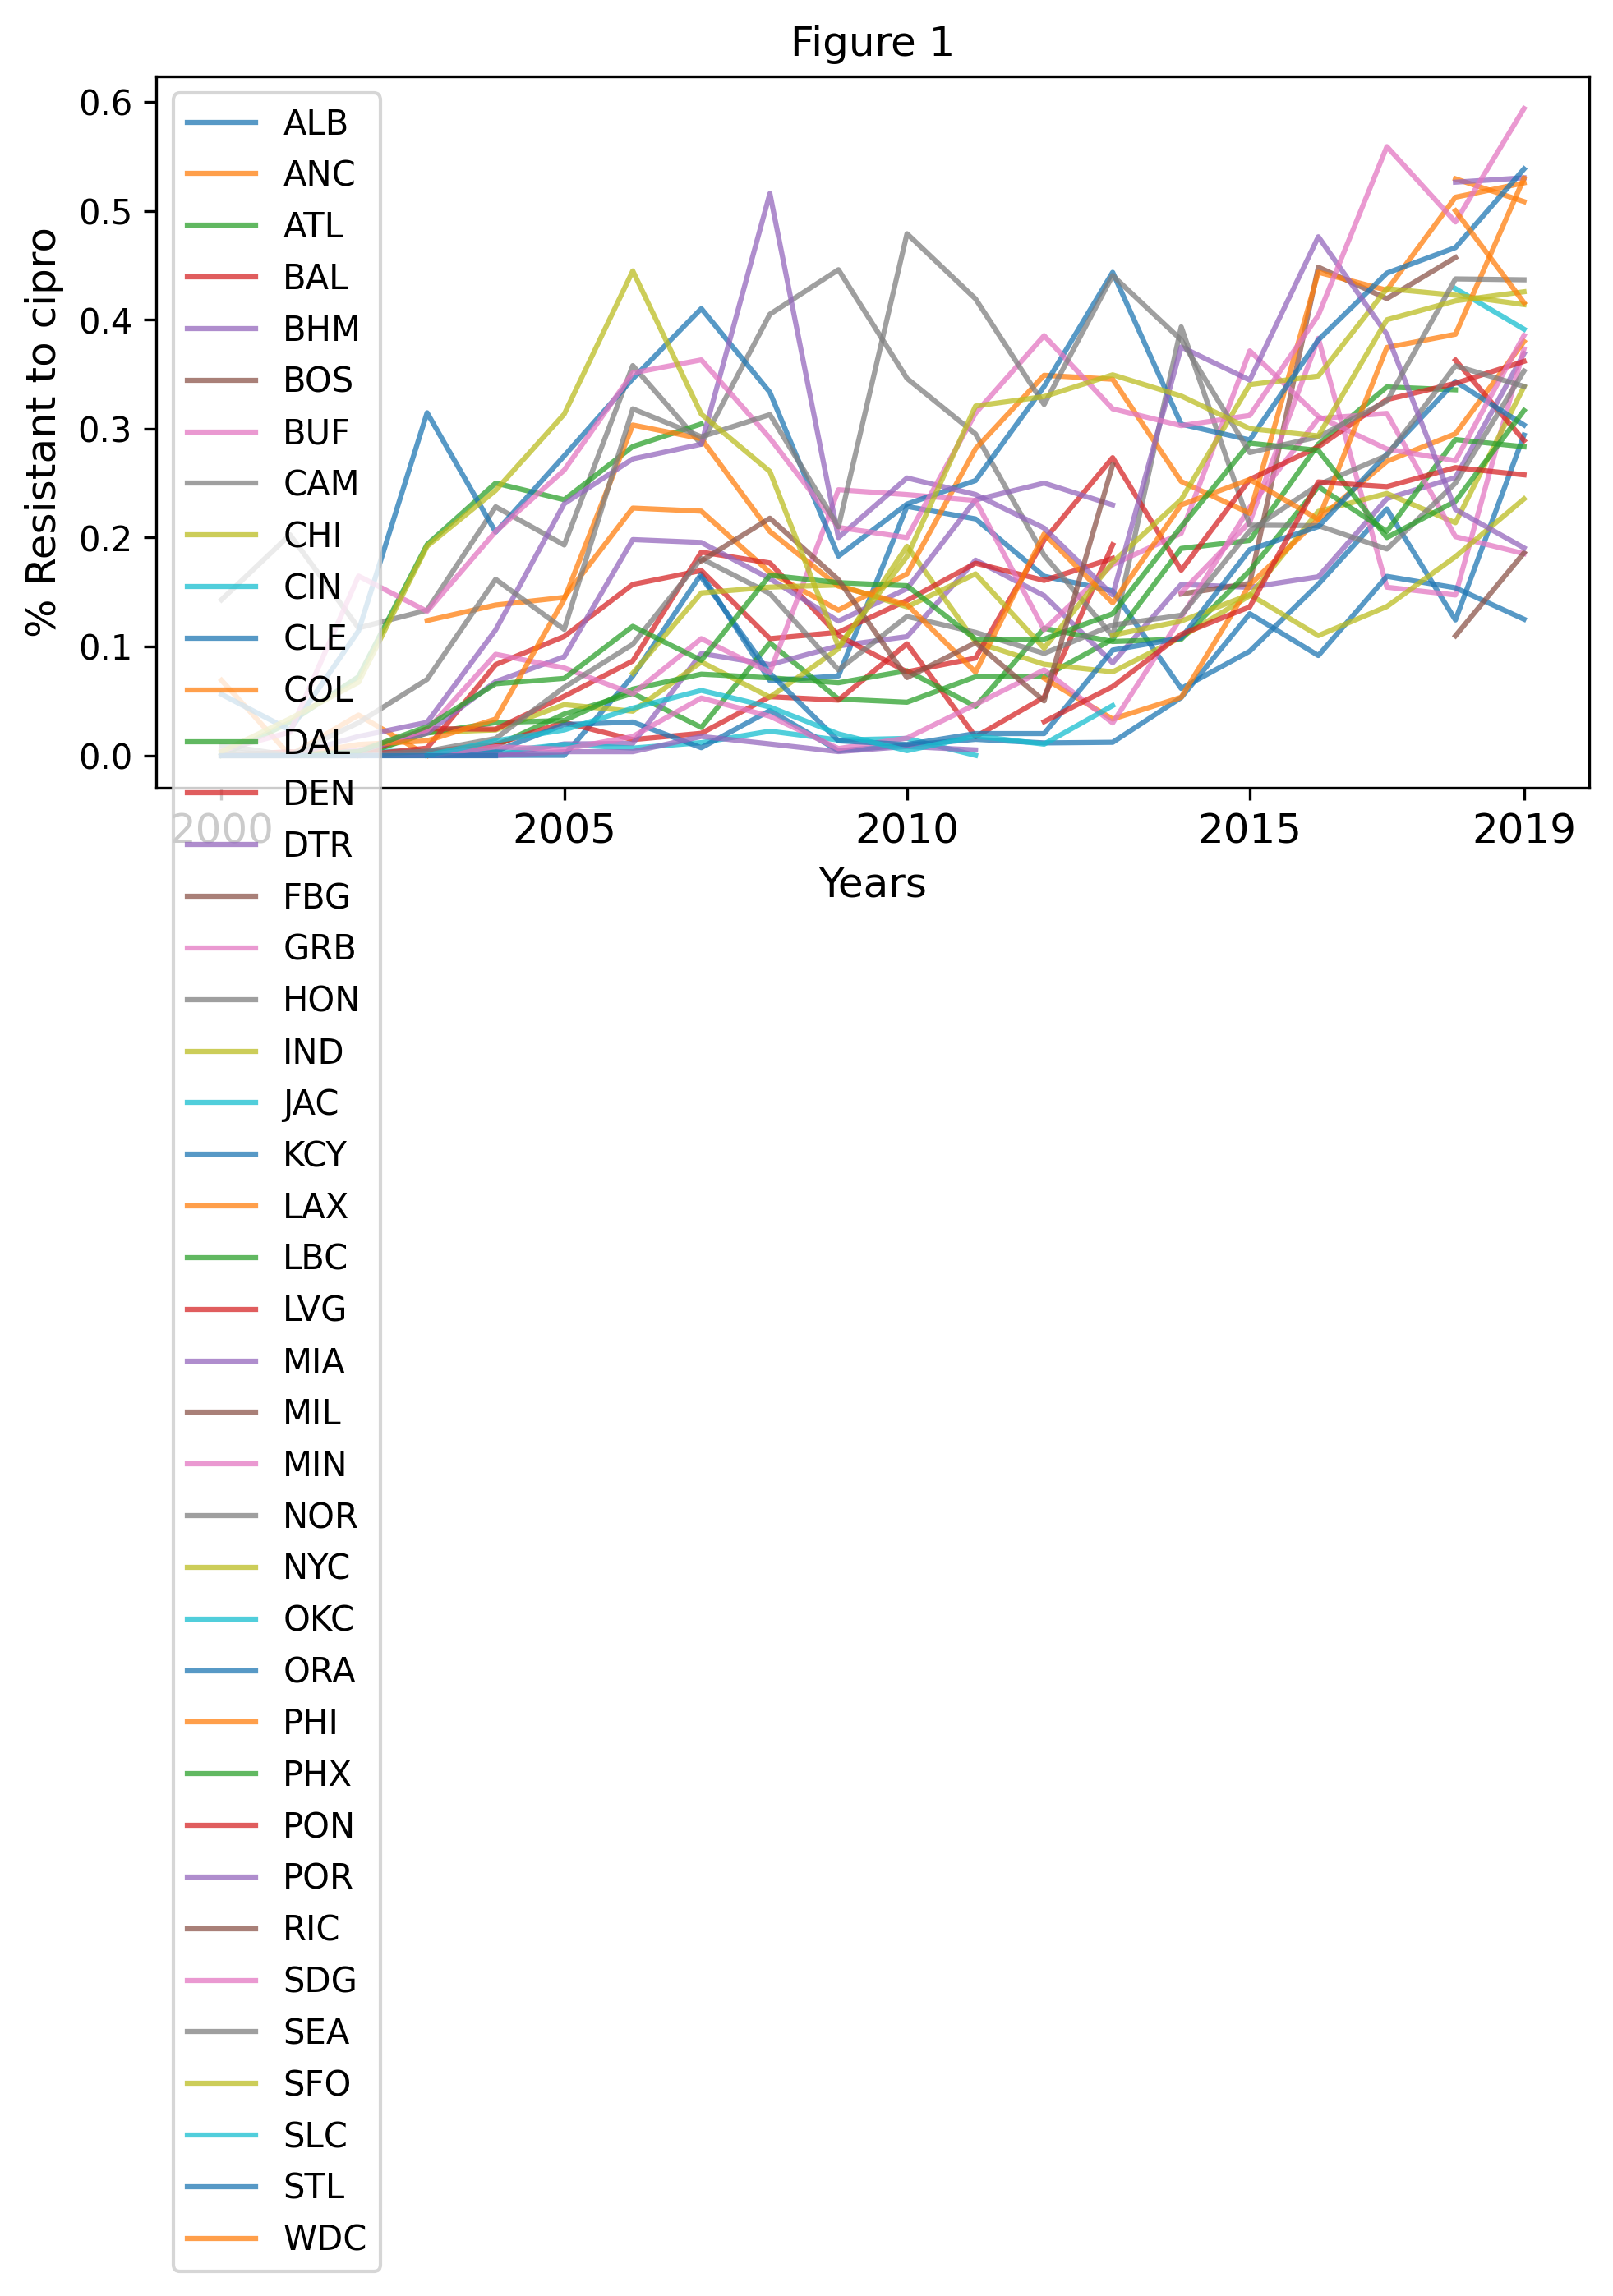

In [17]:
##By location
xAxisYears = [2000, 2005, 2010, 2015, 2019]
figureCount = 1
plt.rcParams["figure.figsize"] = (12,5.5)

years = CIP_data["YEAR"].unique()
clinics = CIP_data["CLINIC"].unique()



plt.subplots(figsize=(7.5, 3.75))

#reistance_by_year_all = pd.DataFrame()
for clinic in clinics:
    CIP_data_clinic = CIP_data.loc[CIP_data['CLINIC'] == clinic]
    reistance_by_year = []
    for year in years:
        CIP_data_clinic_year = CIP_data_clinic.loc[CIP_data_clinic['YEAR'] == year]

        reistance_by_year.append(1 - CIP_data_clinic_year["Susceptible"].sum()/len(CIP_data_clinic_year))
        
    plt.plot(years, reistance_by_year, label=clinic, alpha=0.75)

#  



#plt.plot(years, reistance_by_year)
plt.title("Figure " + str(figureCount))
figureCount+=1

plt.xlabel("Years", fontsize=12)
plt.ylabel("% Resistant to cipro", fontsize=12)
plt.xticks(xAxisYears, fontsize=12)
plt.rcParams['figure.dpi'] = 300
plt.legend()

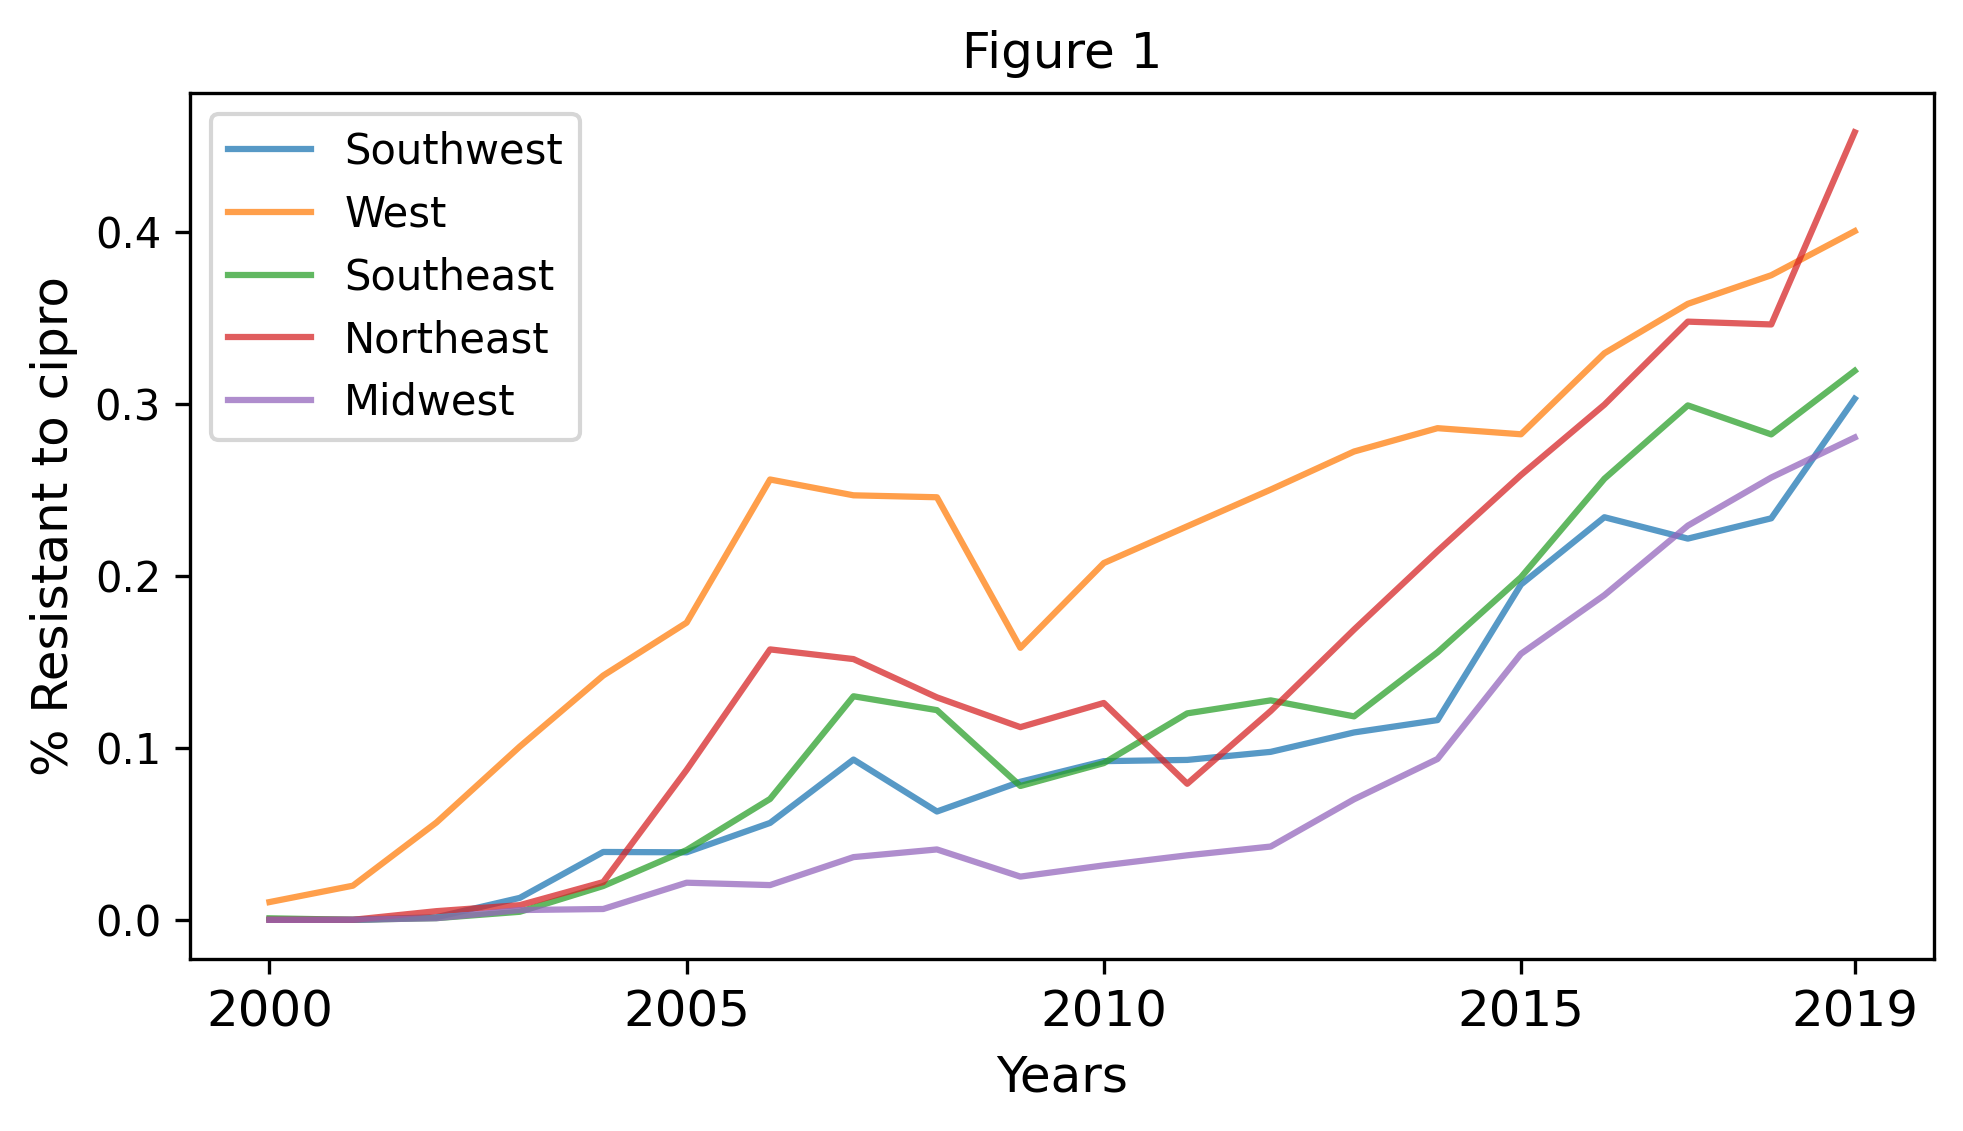

In [19]:
##By location
xAxisYears = [2000, 2005, 2010, 2015, 2019]
figureCount = 1
plt.rcParams["figure.figsize"] = (12,5.5)

years = CIP_data["YEAR"].unique()
regions = CIP_data["REGION"].unique()



plt.subplots(figsize=(7.5, 3.75))

#reistance_by_year_all = pd.DataFrame()
for region in regions:
    CIP_data_region = CIP_data.loc[CIP_data['REGION'] == region]
    reistance_by_year = []
    for year in years:
        CIP_data_region_year = CIP_data_region.loc[CIP_data_region['YEAR'] == year]

        reistance_by_year.append(1 - CIP_data_region_year["Susceptible"].sum()/len(CIP_data_region_year))
        
    plt.plot(years, reistance_by_year, label=region, alpha=0.75)

#  



#plt.plot(years, reistance_by_year)
plt.title("Figure " + str(figureCount))
figureCount+=1

plt.xlabel("Years", fontsize=12)
plt.ylabel("% Resistant to cipro", fontsize=12)
plt.xticks(xAxisYears, fontsize=12)
plt.rcParams['figure.dpi'] = 300
plt.legend()

##By location
 xAxisYears = [2000, 2005, 2010, 2015, 2019]
figureCount = 1
plt.rcParams["figure.figsize"] = (12,5.5)

years = CIP_data["YEAR"].unique()
clinics = CIP_data["CLINIC"].unique()



plt.subplots(figsize=(7.5, 3.75))

#reistance_by_year_all = pd.DataFrame()
for clinic in clinics:
    CIP_data_clinic = CIP_data.loc[CIP_data['CLINIC'] == clinic]
    reistance_by_year = []
    for year in years:
        CIP_data_clinic_year = CIP_data_clinic.loc[CIP_data_clinic['YEAR'] == year]

        reistance_by_year.append(1 - CIP_data_clinic_year["Susceptible"].sum()/len(CIP_data_clinic_year))
        
    plt.plot(years, reistance_by_year, label=clinic, alpha=0.75)

#  



#plt.plot(years, reistance_by_year)
plt.title("Figure " + str(figureCount))
figureCount+=1

plt.xlabel("Years", fontsize=12)
plt.ylabel("% Resistant to cipro", fontsize=12)
plt.xticks(xAxisYears, fontsize=12)
plt.rcParams['figure.dpi'] = 300
plt.legend()
